In [1]:
from utils import *
import numpy as np
from tqdm import tqdm
from copy import copy, deepcopy
import heapq

# Parsing

In [2]:
def get_grids(inlines, c2num=None):
    mat = np.array([[c for c in l] for l in inlines.split("\n")])
    if c2num is None:
        c2num = {}
        for i,c in enumerate(np.unique(mat)):
            c2num[str(c)] = i
    num2c = {v: k for k, v in c2num.items()}
    matnum = np.zeros(mat.shape)
    for k,v in c2num.items():
        matnum[mat==k] = v
    return matnum, mat, c2num, num2c

dirs = [(0,1),(1,0),(-1,0),(0,-1)]

def parse(inlines):
    return get_grids(inlines)

matnum, mat, c2num, num2c = parse(open("data/input16.txt").read())

# Part 1 & 2

In [3]:
epos = np.where(mat=="E")
epos = (int(epos[0][0]), int(epos[1][0]))
spos = np.where(mat=="S")
spos = (int(spos[0][0]), int(spos[1][0]))

class Node:
    def __init__(self, cost, hist):
        self.cost = cost
        self.hist = hist
    def __lt__(self, other):
        return self.cost < other.cost

dirs = [(1,0), (0,1), (-1,0), (0,-1)]

def step(dims, grid, curpos, curdir):
    newpos = []
    for d, c in zip([curdir, turn_left(curdir), turn_right(curdir)], [1, 1001, 1001]):
        if 0<=curpos[0]+d[0]<dims[0] and 0<=curpos[1]+d[1]<dims[1] and grid[curpos[0]+d[0],curpos[1]+d[1]]!=c2num["#"]:
            newpos.append(((curpos[0]+d[0], curpos[1]+d[1]), c, d))
    return newpos

def dijkstra(grid, startpos, goalpos):
    q = []
    curdir = (0,1)
    curstate = (startpos, curdir)
    heapq.heappush(q, Node(0, [curstate]))
    goal_hists = []
    cost_dict = {curstate: 0}
    goal_cost = -1

    while True:
        if not q:
            break
        curnode = heapq.heappop(q)
        curcost = curnode.cost
        if goal_cost>0 and curcost>goal_cost:
            break
        curhist = curnode.hist
        curstate = curhist[-1]

        for newpos, cost, d in step(grid.shape, grid, curstate[0], curstate[1]):
            newstate = (newpos, d)
            newcost = curcost + cost
            if (newstate not in cost_dict or newcost<=cost_dict[newstate]):
                cost_dict[newstate] = newcost
                heapq.heappush(q, Node(newcost, curhist + [newstate]))
                if newpos==goalpos:
                    if goal_cost<0:
                        goal_cost = newcost
                    goal_hists.append(curhist + [newstate])

    matcop = np.copy(matnum)
    for hist in goal_hists:
        for p,d in hist:
            matcop[p] = -1

    return goal_cost, int(np.sum(matcop==-1)), matcop

gc, n, matcop = dijkstra(matnum, spos, epos)
print(gc)
print(n)

111480
529


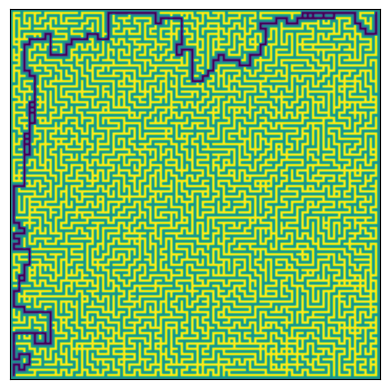

In [6]:
import matplotlib.pyplot as plt
plt.imshow(matcop)
plt.xticks([])
plt.yticks([])
plt.savefig("images/16.png")